/var/folders/_c/jm66wb4d7gl570d8vx4_wpx00000gn/T/ipykernel_46022/194366542.py:7: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


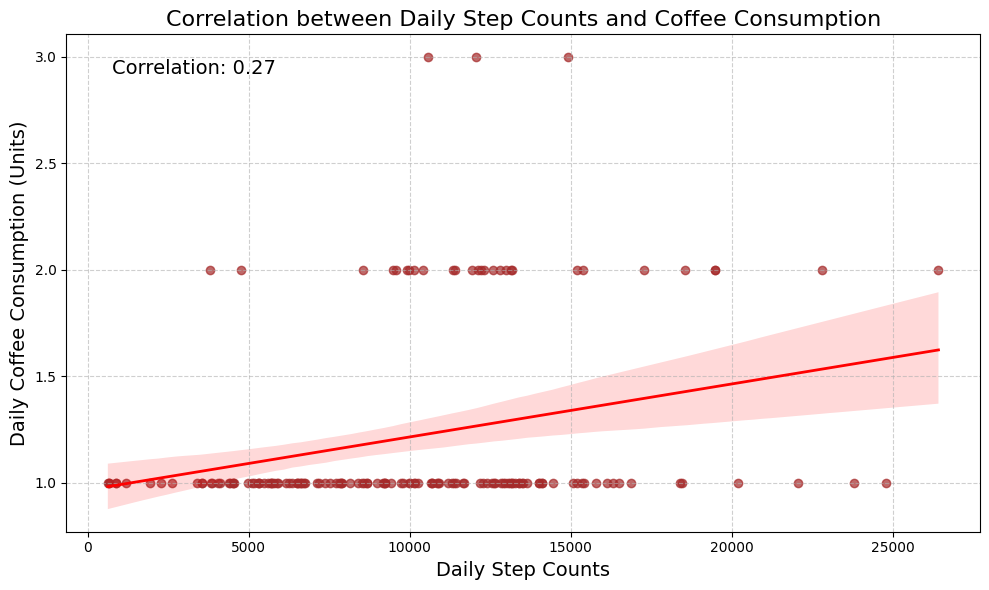

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
from scipy.stats import pearsonr  

def load_and_process_data(csv_file):
    df = pd.read_csv(csv_file)

    df = df[df['type'] == 'HKQuantityTypeIdentifierStepCount']

    df['startDate'] = pd.to_datetime(df['startDate'])

    df = df[(df['startDate'] >= '2023-09-01')]

    df['date'] = df['startDate'].dt.date
    df['value'] = pd.to_numeric(df['value'], errors='coerce')

    daily_steps = df.groupby('date')['value'].sum().reset_index()

    return daily_steps

def load_and_process_coffee_data(csv_file):
    data = pd.read_csv(csv_file, sep=';', skiprows=1, names=['Date', 'Place', 'Amount'])
    data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')
    data = data[data['Date'] != 'Date']

    data['Date'] = pd.to_datetime(data['Date'])

    daily_coffee_consumption = data.groupby('Date')['Amount'].sum().reset_index()

    return daily_coffee_consumption

step_csv_file = 'apple_health_data.csv'
coffee_csv_file = 'spending_data1.csv'

daily_steps = load_and_process_data(step_csv_file)
daily_coffee = load_and_process_coffee_data(coffee_csv_file)

daily_steps['date'] = pd.to_datetime(daily_steps['date'])
daily_coffee['Date'] = pd.to_datetime(daily_coffee['Date'])

merged_data = pd.merge(daily_steps, daily_coffee, left_on='date', right_on='Date', how='inner')

correlation, _ = pearsonr(merged_data['value'], merged_data['Amount'])

plt.figure(figsize=(10, 6))

plt.scatter(merged_data['value'], merged_data['Amount'], color='brown', alpha=0.7)

sns.regplot(x=merged_data['value'], y=merged_data['Amount'], scatter=False, color='blue', line_kws={'color': 'red', 'lw': 2})

plt.title('Correlation between Daily Step Counts and Coffee Consumption', fontsize=16)
plt.xlabel('Daily Step Counts', fontsize=14)
plt.ylabel('Daily Coffee Consumption (Units)', fontsize=14)

plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=14, color='black', ha='left', va='top')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()
